In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from utils import get_outliers, outlier_pct
from statsmodels.tsa.stattools import adfuller

In [2]:
df = pd.read_csv("MonthWiseMarketArrivals_clean.csv")
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   market    10227 non-null  object
 1   month     10227 non-null  object
 2   year      10227 non-null  int64 
 3   quantity  10227 non-null  int64 
 4   priceMin  10227 non-null  int64 
 5   priceMax  10227 non-null  int64 
 6   priceMod  10227 non-null  int64 
 7   state     10227 non-null  object
 8   city      10227 non-null  object
 9   date      10227 non-null  object
dtypes: int64(5), object(5)
memory usage: 799.1+ KB


In [4]:
#Check for the unique market data
df["state"].unique()

array(['PB', 'UP', 'GUJ', 'MS', 'RAJ', 'KNT', 'MP', 'OR', 'BHR', 'WB',
       'CH', 'TN', 'DEL', 'ASM', 'AP', 'JK', 'HR', 'KER', 'JH', 'HP',
       'KEL'], dtype=object)

In [5]:
#Check for the uniquesn of the month
df["month"].nunique()

12

In [6]:
#Check for the total number of observation in each state
df.state.value_counts()

state
MS     4354
KNT     958
GUJ     929
UP      617
PB      593
RAJ     462
TN      350
MP      309
AP      278
HR      233
WB      187
JK      163
DEL     158
BHR     140
ASM     134
OR      129
JH      123
KEL      55
HP       40
KER      13
CH        2
Name: count, dtype: int64

In [7]:
#Subset the data to PB state only
pb = df[df["state"] == "PB"]
pb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593 entries, 0 to 7422
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   market    593 non-null    object
 1   month     593 non-null    object
 2   year      593 non-null    int64 
 3   quantity  593 non-null    int64 
 4   priceMin  593 non-null    int64 
 5   priceMax  593 non-null    int64 
 6   priceMod  593 non-null    int64 
 7   state     593 non-null    object
 8   city      593 non-null    object
 9   date      593 non-null    object
dtypes: int64(5), object(5)
memory usage: 51.0+ KB


In [8]:
df.year.unique()

array([2005, 2006, 2010, 2011, 2012, 2013, 2014, 2015, 2007, 2009, 2008,
       2016, 2002, 2004, 2003, 2001, 1999, 2000, 1998, 1996, 1997])

In [9]:
# result = adfuller(pb.values.dropna())
# print('ADF Statistic: %f' % result[0])
# print('p-value: %f' % result[1])

In [10]:
#Check for any nnull in the value
df.priceMod.isnull().sum()

np.int64(0)

In [11]:
df_2005 = pb[pb["year"] == 2007]
df_2005.priceMod.describe()

count      41.000000
mean      962.146341
std       369.998889
min       485.000000
25%       637.000000
50%       895.000000
75%      1175.000000
max      1825.000000
Name: priceMod, dtype: float64

## Identify the Ouliers

In [12]:
outliers = get_outliers(pb, "priceMod")
outlier_pct(len(pb), len(outliers))

Length of Dataset: 593
Length of Outlier: 38
The outlier is 6.41% of the dataset


In [13]:
def plot_series(plot_data, year=2005):
    year_data = plot_data[plot_data["year"] == year]
    plt.figure(figsize=(8, 6))
    plt.plot(year_data['month'], year_data['priceMod'], marker='o', linestyle='-', color='b')
    # Customize the plot
    plt.title(f"Monthly Average PriceMod for {year}")
    plt.xlabel('Month')
    plt.ylabel('Average PriceMod')
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.grid(True)
    plt.show()

In [14]:
#Run the plot for the total year
yearly_monthly_data = pb.groupby(["year", "month"])["priceMod"].mean().reset_index()
yearly_monthly_data

,year,month,priceMod
0,2005,August,474.500000
1,2005,December,765.666667
2,2005,February,366.333333
3,2005,January,440.000000
4,2005,July,396.666667
...,...,...,...
128,2015,November,2166.833333
129,2015,October,2886.500000
130,2015,September,3573.333333
131,2016,February,991.166667


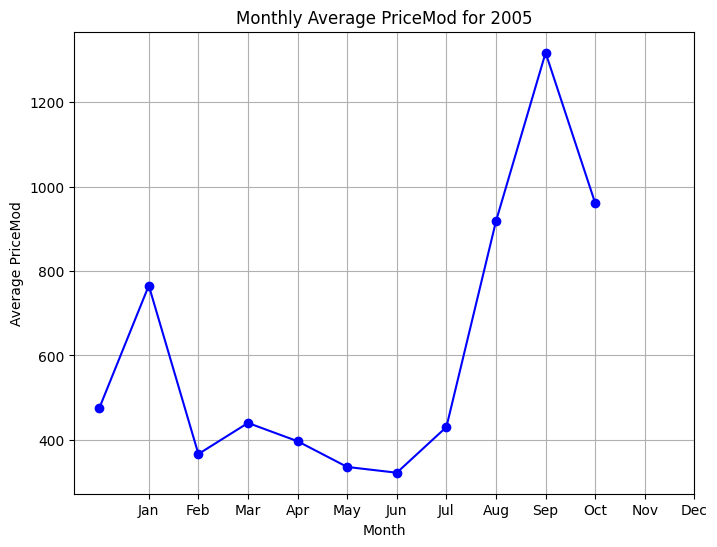

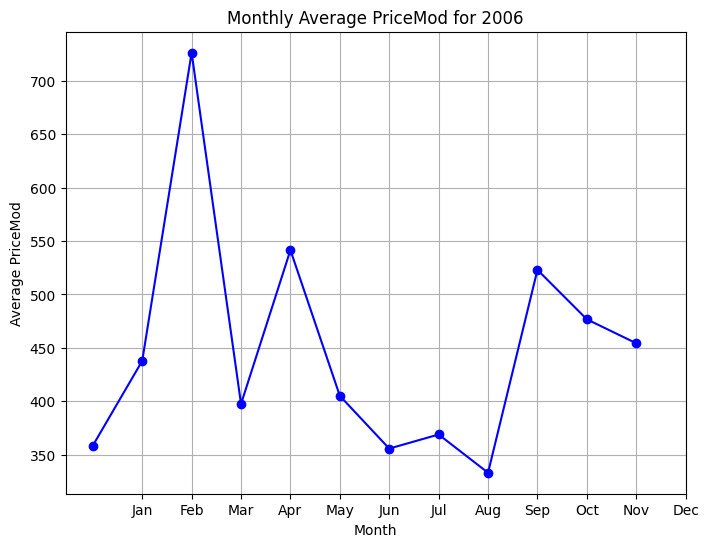

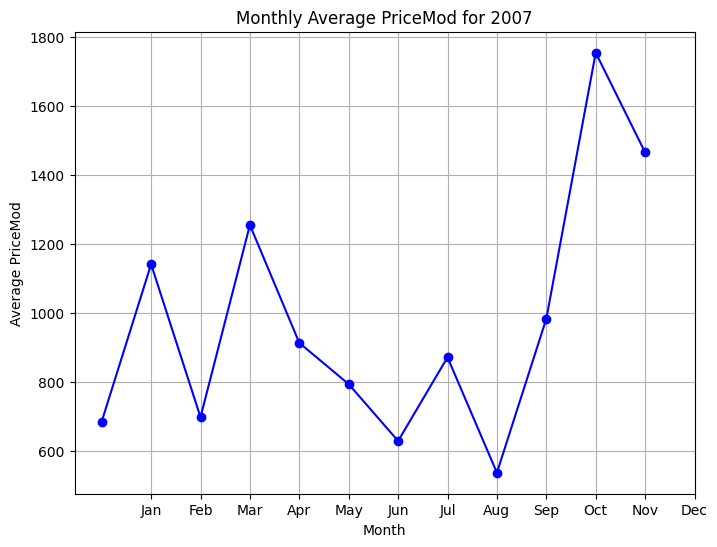

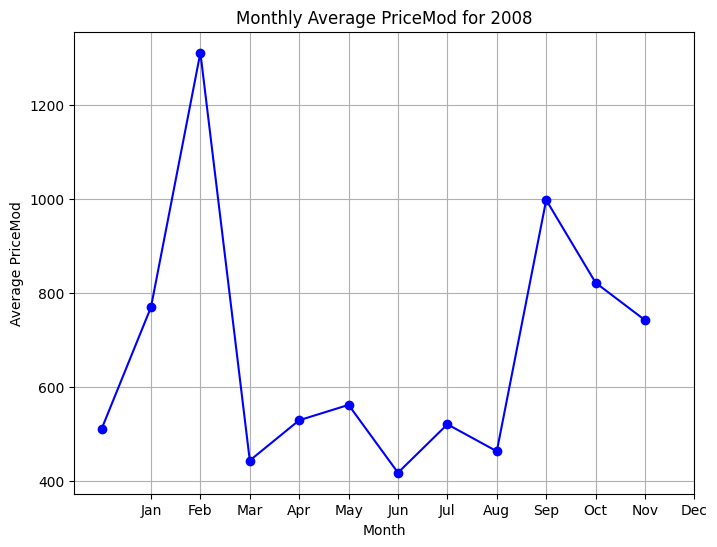

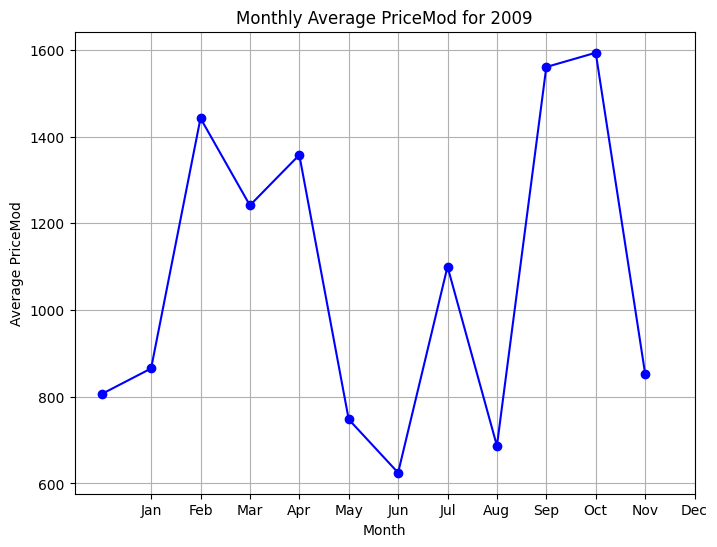

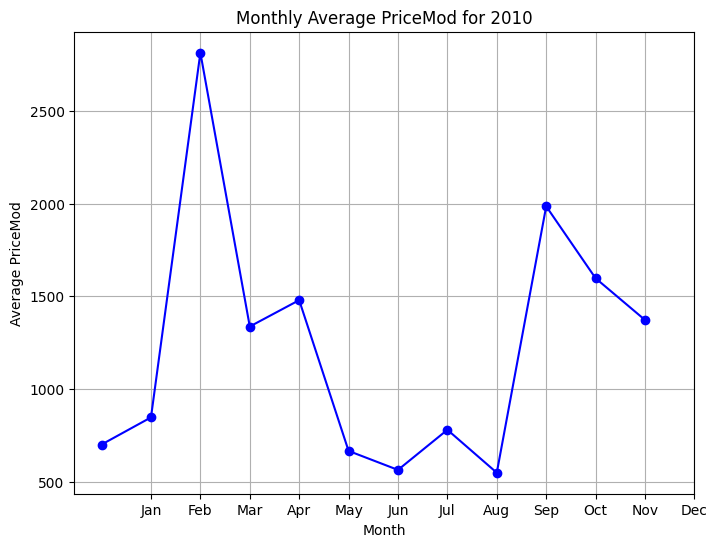

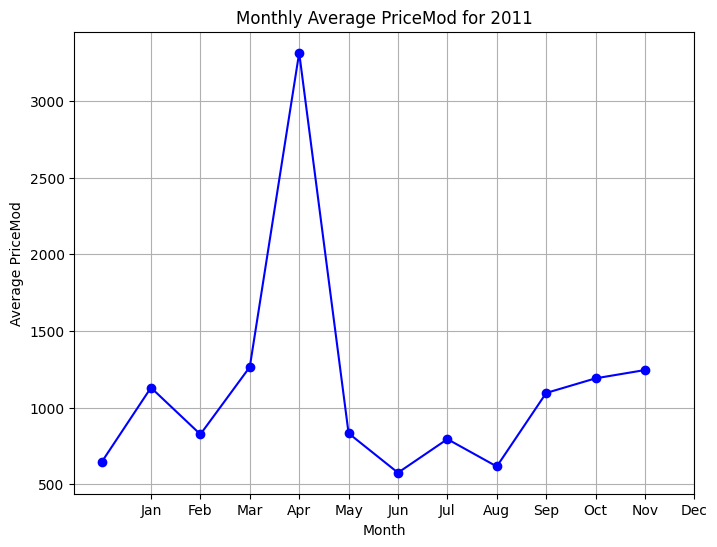

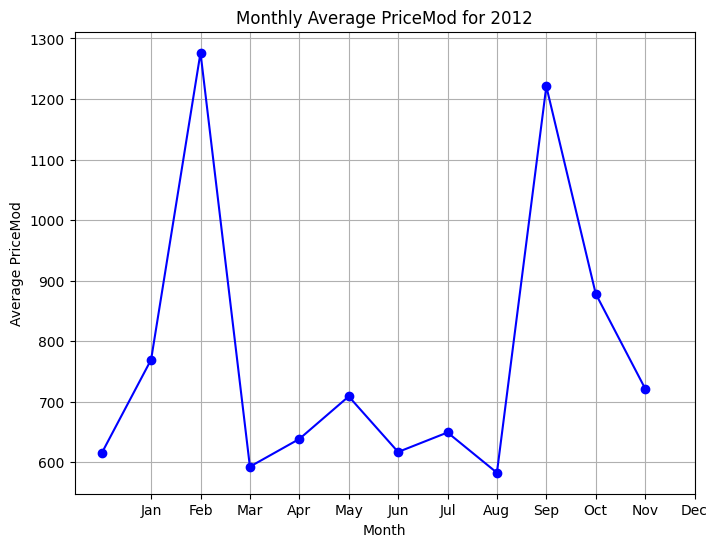

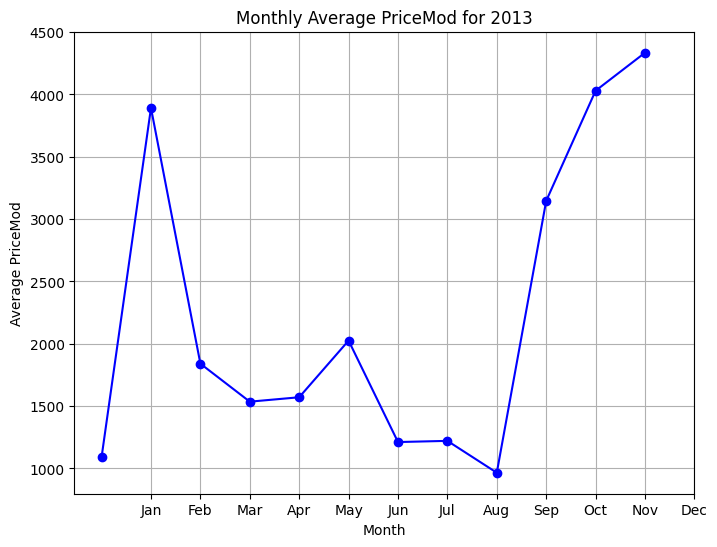

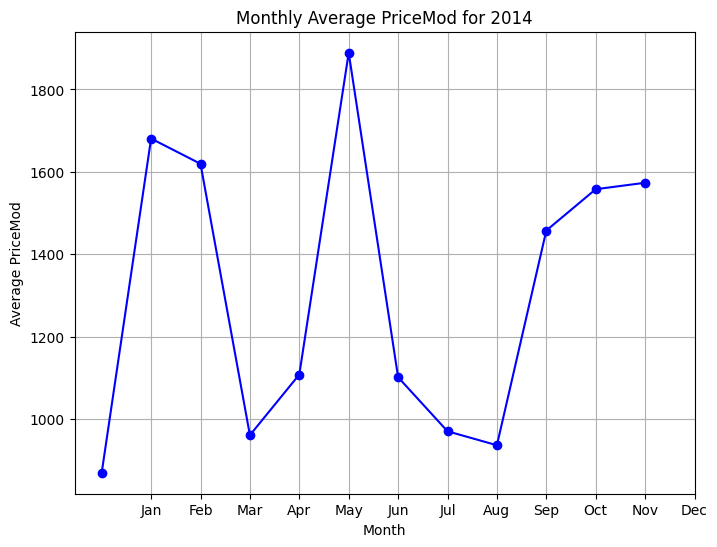

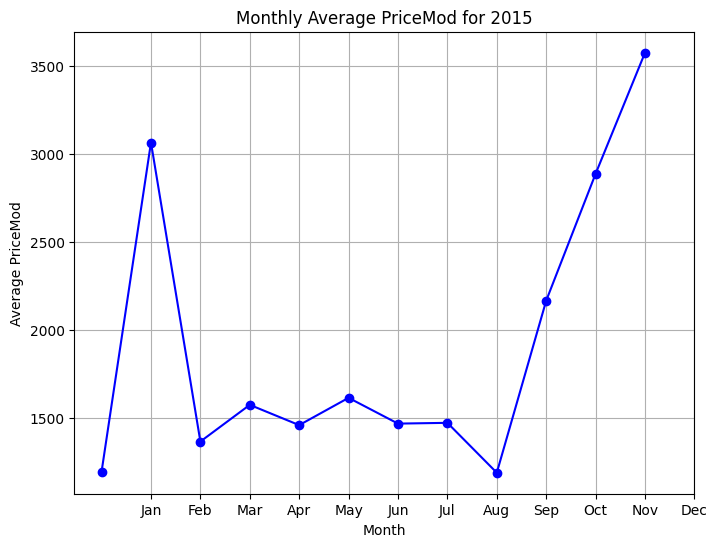

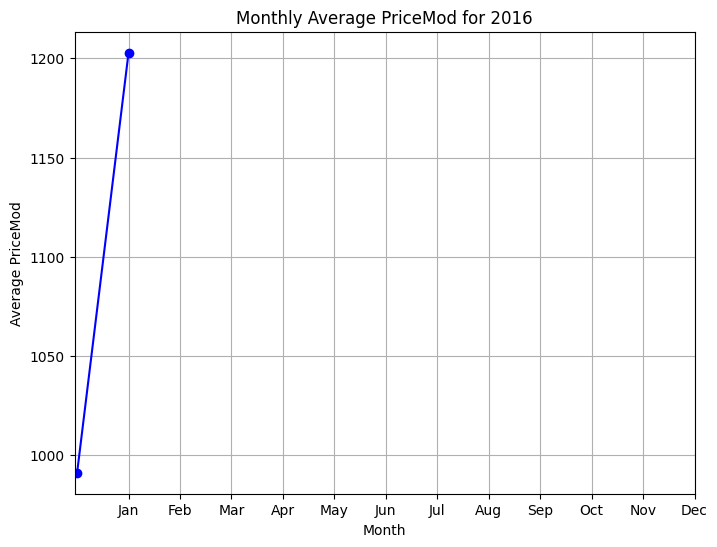

In [15]:
years_to_plot = yearly_monthly_data['year'].unique()
for year in years_to_plot:
    plot_series(yearly_monthly_data, year)

In [16]:
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib as mpl

# # Map month names to integers
# month_mapping = {
#     'January': 1, 'February': 2, 'March': 3, 'April': 4,
#     'May': 5, 'June': 6, 'July': 7, 'August': 8,
#     'September': 9, 'October': 10, 'November': 11, 'December': 12
# }
# yearly_monthly_data['month'] = yearly_monthly_data['month'].map(month_mapping)

# # Sort by year and month
# yearly_monthly_data = yearly_monthly_data.sort_values(by=['year', 'month'])

# # Prepare unique years
# years = yearly_monthly_data['year'].unique()

# # Prepare Colors
# np.random.seed(100)
# mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# # Draw Plot
# plt.figure(figsize=(16, 12), dpi=80)
# for i, y in enumerate(years):
#     year_data = yearly_monthly_data.loc[yearly_monthly_data['year'] == y, :]
#     plt.plot(year_data['month'], year_data['priceMod'], color=mycolors[i], label=f'Year {y}')
#     # Annotate the last point
#     plt.text(
#         x=year_data['month'].iloc[-1] - 0.2,
#         y=year_data['priceMod'].iloc[-1],
#         s=f'{y}',
#         fontsize=10,
#         color=mycolors[i]
#     )

# # Decoration
# plt.gca().set(
#     xlim=(1, 12),
#     ylim=(yearly_monthly_data['priceMod'].min() - 50, yearly_monthly_data['priceMod'].max() + 50),
#     ylabel='Average PriceMod',
#     xlabel='Month'
# )
# plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=10)
# plt.yticks(fontsize=10, alpha=0.7)
# plt.title("Seasonal Plot of Average PriceMod by Year", fontsize=20)
# plt.legend(title="Year", loc='upper right', fontsize=10)
# plt.tight_layout()
# plt.show()


In [17]:
pb.priceMod.describe()

count     593.000000
mean     1195.551433
std       790.255829
min       250.000000
25%       638.000000
50%      1025.000000
75%      1463.000000
max      5018.000000
Name: priceMod, dtype: float64

(array([46., 34., 27., 14.,  3.,  0.,  3.,  2.,  2.,  2.]),
 array([ 322.  ,  723.22, 1124.44, 1525.66, 1926.88, 2328.1 , 2729.32,
        3130.54, 3531.76, 3932.98, 4334.2 ]),
 <BarContainer object of 10 artists>)

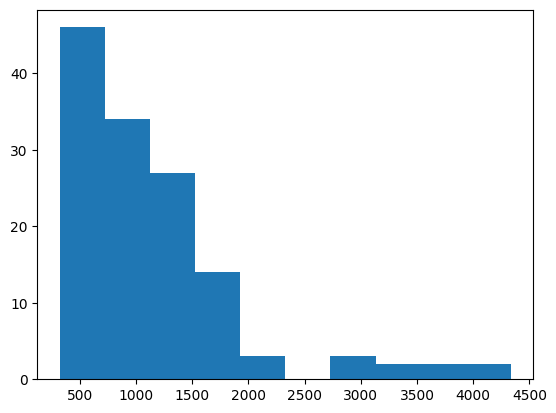

In [18]:
plt.hist(yearly_monthly_data["priceMod"])

In [46]:
#subset the oulier
sub_data = pb[pb.priceMod < 2000]
len(sub_data)

540

(array([41., 82., 78., 68., 54., 54., 68., 50., 30., 15.]),
 array([ 250. ,  423.3,  596.6,  769.9,  943.2, 1116.5, 1289.8, 1463.1,
        1636.4, 1809.7, 1983. ]),
 <BarContainer object of 10 artists>)

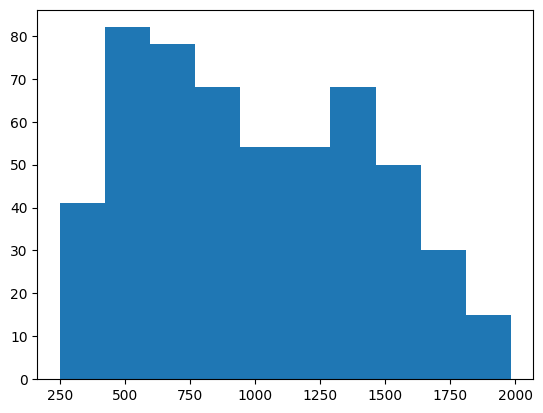

In [48]:
plt.hist(sub_data["priceMod"])

In [49]:
sub_data.priceMod.describe()

count     540.000000
mean      997.533333
std       431.770834
min       250.000000
25%       608.750000
50%       948.500000
75%      1357.000000
max      1983.000000
Name: priceMod, dtype: float64

In [50]:
outliers_2 = get_outliers(sub_data, "priceMod")
outlier_pct(len(sub_data), len(outliers_2))

Length of Dataset: 540
Length of Outlier: 0
The outlier is 0.0% of the dataset
